### AdaBoost Classification

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
#hearing tests
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

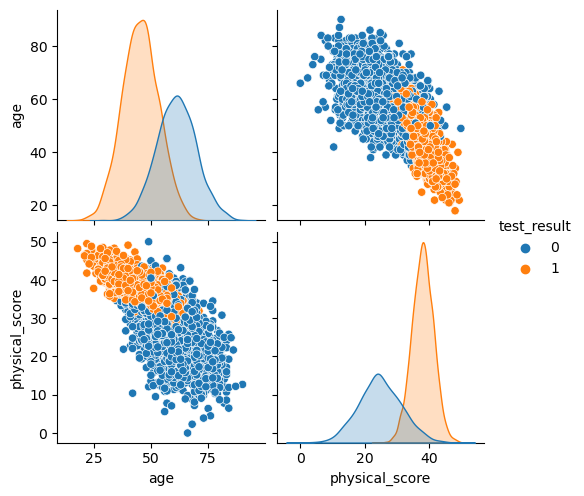

In [4]:
sns.pairplot(df, hue='test_result')  #the nice separation between the test results should be give us a good prediction

#### Separate X features & y labels

In [5]:
X = df.drop('test_result', axis=1)
y = df['test_result']

#### Split Training/Test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Train the model

In [7]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier() 
model.fit(X_train, y_train)

AdaBoostClassifier()

#### Test the model

In [8]:
y_pred = model.predict(X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

,y_test,y_pred
4260,0,0
4409,1,1
3720,1,1
618,1,1
4139,0,0


#### Evaluate the model

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

#model.coef_  #not available

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy Score: 0.934
Precision Score: 0.935078002244669
Recall Score: 0.934
F1 Score: 0.9333687397729763


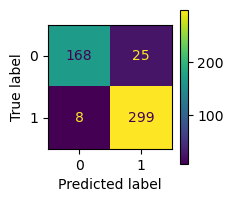

In [12]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test).figure_.set_size_inches(2, 2)
plt.show()

In [13]:
confusion_matrix(y_test, y_pred)

array([[168,  25],
       [  8, 299]], dtype=int64)

In [14]:
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report # this breaks down the metrics by class 

,precision,recall,f1-score,support
0,0.954545,0.870466,0.910569,193.000
1,0.922840,0.973941,0.947702,307.000
accuracy,0.934000,0.934000,0.934000,0.934
macro avg,0.938692,0.922204,0.929136,500.000
weighted avg,0.935078,0.934000,0.933369,500.000


#### What are the most important X features?

In [15]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance')
#physical_score is the most important feature

,Feature Importance
age,0.32
physical_score,0.68


#### Visualize

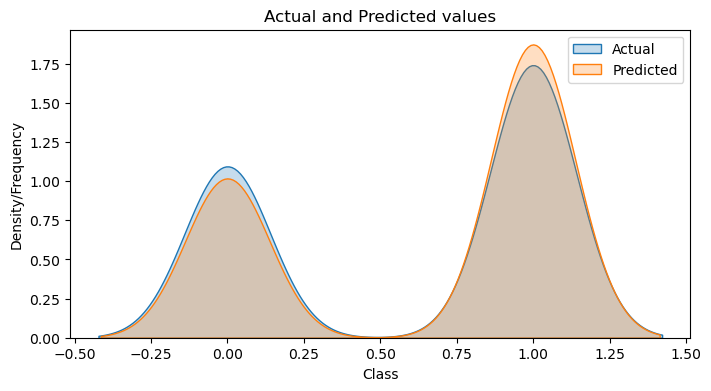

In [16]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred largely overlap, thus the predictions are closely aligned with the actual values.

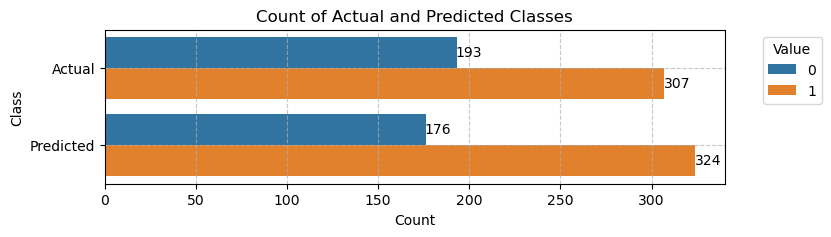

In [17]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(8, 2))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict future patient

In [18]:
model.predict([[33, 40]])
#if patient is age 33 and has physical score of 40, then they will pass the hearing test

array([1], dtype=int64)

#### Elbow Method

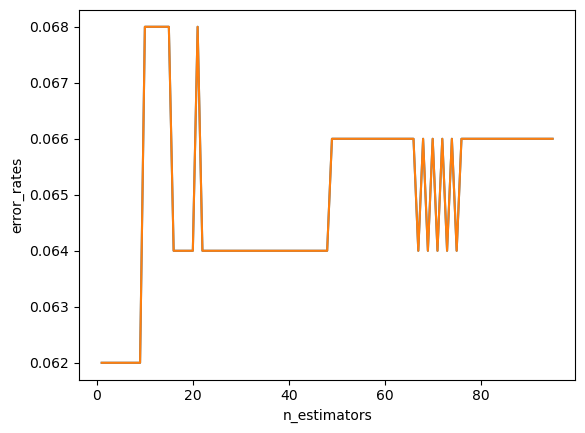

In [20]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    
    error_rates.append(err)
    
    
    
plt.plot(range(1,96), error_rates)
plt.xlabel('n_estimators')
plt.ylabel('error_rates')
plt.show()

